# [1] Check the accuracy of $\overline{W}(x)$ in a $M/M/1/PS$

In [1]:
import sojourn
from matplotlib import pyplot as plt

In [2]:
# Check how W(x=1) varies as we increase infty

Ws = []
infs = list(range(20))
for inf in infs:
    mm1ps = sojourn.MM1PS(mu=4, lambda_=3, infty=inf)
    Ws += [mm1ps.W(1)]

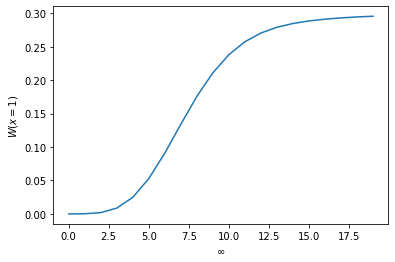

In [3]:
plt.plot(infs, Ws)
plt.xlabel(r'$\infty$')
plt.ylabel(r'$W(x=1)$');

## TODO - check if $\overline{W}(x)$ maches CIW values in a PS system

[1] Masuyama, Hiroyuki, and Tetsuya Takine. "Sojourn time distribution in a
    MAP/M/1 processor-sharing queue." Operations Research Letters 31.5 (2003):
    406-412.


# $W(x)$ on a $M_n/M/1/PS$ system

In [2] authors state that a single server of a $M/M/R/JSQ/PS$ system behaves as a
$M_n/M/1/PS$.

Here $M_n$ denotes a Poisson arrival process with state dependant rate.
In particular, such a process has arrival rate $\lambda(n)$ with $n$ being
the number of users in the server of interest.

The higher the $n$, the lower the arrival rate. As the JSQ policy
will not dispatch arrivals there.

[2] states that simulation yields
$$ \frac{\lambda(n)}{\mu} \sim \rho^k,\quad n\ge3 $$

-----

An $M_n$ arrival process is a Markovian process, hence,
we use [1] to derive $\overline{W}(x)$ in a $M_n/M/1/PS$ process.

## Birth-death process

We will mimic how an $M/M/1/PS$ is in [2], to derive the
reasoning for our $M_n/M/1/PS$ system.

### $M/M/1$
According to [3], an $M/M/1$ is a birth-death process.
Following the notation of [Section 2 - 3rd paragraph, 2], we have:

$$C = -\lambda I $$
$$ D = \left(\begin{matrix}
    0 & \lambda & 0 & 0 & \ldots \\
    \mu & -\mu & \lambda & 0 & \ldots\\
    0 & \mu & -\mu & \lambda & \ldots\\
    \ldots & \ldots & \ldots & \ldots & \ldots\\
\end{matrix}\right)
$$

Hence, it satisfies ${\bf \pi}(C+D)=0$. With
$$ {\bf \pi} = (\pi_0, \ldots, \pi_n) $$
being the probability of being in state $0,\ldots,n$.
That is, the probability of having $0,\ldots,n$ users in the system.

The generation matrix is $Q=C+D$.

### $M/M/1/PS$
The generation matrix of the associated birth death process is the same.
This is because the CTMC (continious time markov chain) matches.
See [Section 22.3, 4]

### $M_n/M/1/PS$
The only difference with respect to the previous systems,
is that the arrival rate depends on the number of users.
Hence, one gets:

$$C=\left(\begin{matrix}
    -\lambda(0) & 0 & 0 & \ldots\\
    0 & -\lambda(1) & 0 & \ldots\\
    0 & 0 & -\lambda(2) & \ldots\\
    \ldots & \ldots & \ldots & \ldots\\
\end{matrix}\right)
$$

$$D = \left(\begin{matrix}
    0 & \lambda(0) & 0 & 0 & \ldots \\
    \mu & -\mu & \lambda(1) & 0 & \ldots\\
    0 & \mu & -\mu & \lambda(2) & \ldots\\
    \ldots & \ldots & \ldots & \ldots & \ldots\\
\end{matrix}\right)$$

# Computation of $W(x)$

## $M/M/1/PS$
If we look at [(8),1], we see that the probability of
having $n$ customers in the service is
$$ \lambda^{-1}{\bf \pi_0 R^nD} $$
for the $M/M/1/PS$ this turns out to be
$$(1-\rho)\rho^n$$
that is, the probability of having $n$ users un the system.

As a result, [Corollary 2, 1] provides a closed formula
for the sojourn time inverse CDF $W(x)=\mathbb{P}(W>x)$, with $W$ being the soujourn time.

----


## $M_n/M/1/PS$
We now proceed and derive the ${\bf \pi_0}$, the probability of having 0 users.

We have this CTMC
```txt
   __  λ(0)__   __  λ(1)__ 
  /          \./          \.
 0            1            2   ....
  \.____μ____/ \.____μ____/
```
hence:
$$
{\bf \pi_{n+1}} \lambda(0) = {\bf \pi_n} \mu
$$
Thus, we have:
$$
{\bf \pi_{n+1}}  = {\bf \pi_0} \frac{\prod_{i=0}^n \lambda(i)}{\mu^n}
$$
and
$$
1 = \sum_n^\infty {\bf \pi_n} = \sum_n^\infty {\bf \pi_0}\frac{\prod_{i=0}^n \lambda(i)}{\mu^n}
$$
which gives us:
$$
{\bf \pi_0} = \left[ \sum_n^\infty\frac{\prod_{i=0}^n \lambda(i)}{\mu^n} \right]^{-1}
$$

-----

As a result we can derive ${\bf \pi_n}$ for our $M_n/M/1/PS$ system using the
equations above. And substitute the term $$ \lambda^{-1}{\bf \pi_0 R^nD} $$
of [(8),1] by ${\bf \pi_n}$

-----

The only thing left is to compute $h_{n,k+1}$ as it appears
in [Corollary 2, 1].

Based on [(9),1], and [Corollary 2,1] I think that the expression is:

$$ h_{n,k+1}=\frac{n}{n+1}\frac{\mu}{\lambda'+\mu} h_{n-1,k} + \frac{\lambda(n)}{\lambda'+\mu}h_{n+1,k}$$
with $\lambda'=\max \{\lambda(i)\}_i^\infty$.

Note that [(7),2] states that $\lambda(n)$ stabilizes for $n\ge3$, so we could consider

$$\lambda'=\frac{\rho^k}{\mu}, \quad \rho=\frac{\lambda}{k\mu}$$
with $k$ being the number of servers in a $M/M/k/JSQ/PS$, and $\lambda$ the total arrival rate in such system.

# TODO - @Jorge

implement the above to compute $\overline{W}(x)$ in a $M_n/M/1/PS$ system.

Being such system one of the queues of a $M/M/k/JSQ/PS$.

And see if it matcehs with simulation

[2] Gupta, Varun, et al. "Analysis of join-the-shortest-queue routing for web server farms." Performance Evaluation 64.9-12 (2007): 1062-1081.

[3] https://www.cs.cmu.edu/~osogami/thesis/html/node69.html#fig:QBDprocesses

[4] Harchol-Balter, Mor. Performance modeling and design of computer systems: queueing theory in action. Cambridge University Press, 2013.